# Decision tree for regression

####Here we will be constructing a single decision tree for a regression task

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format="retina"

## Data preparation

Our data will be a noisy trogonometric function

In [ ]:
N_samples = 500
X = np.linspace(0, 1, N_samples).reshape(-1, 1)
Y = (np.exp(-np.cos(4*np.pi*X))*np.sin(2*np.pi*X))[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=11)
order = np.argsort(X_test, axis=0)[:, 0]
y_test = y_test[order]
X_test = X_test[order]

noise = np.random.randn(*y_train.shape)*0.5
np.random.seed(14)
y_train = y_train + noise

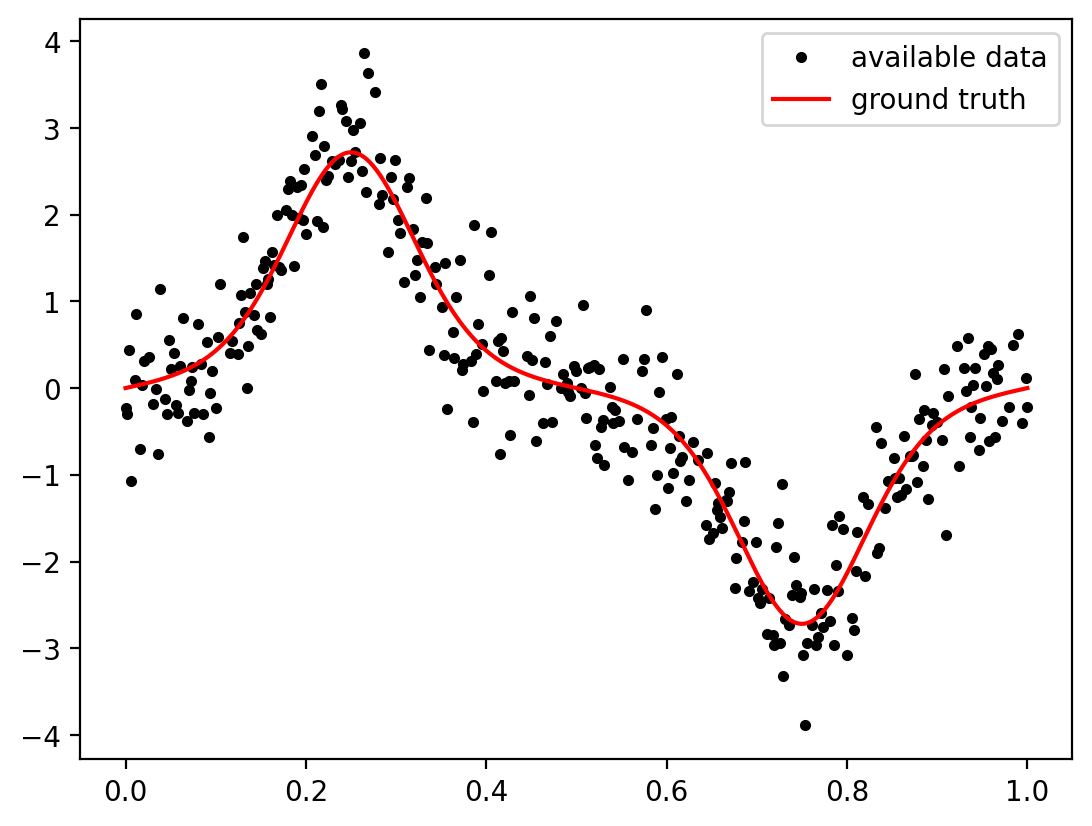

In [ ]:
plt.plot(X_train[:, 0], y_train, '.', color="black", label="available data")
plt.plot(X[:, 0], Y, color="red", label="ground truth")
plt.legend();

#### Let's try to create a single decision tree. Vary the maximum depth in order to see the overfitting

In [ ]:
regressor = DecisionTreeRegressor(random_state=0, splitter="random", max_depth=1)

regressor.fit(X_train, y_train)
prediction_single_model = regressor.predict(X_test)

relative_error = np.linalg.norm(prediction_single_model - y_test) / np.linalg.norm(y_test)
print(relative_error)

1.0000160187281935


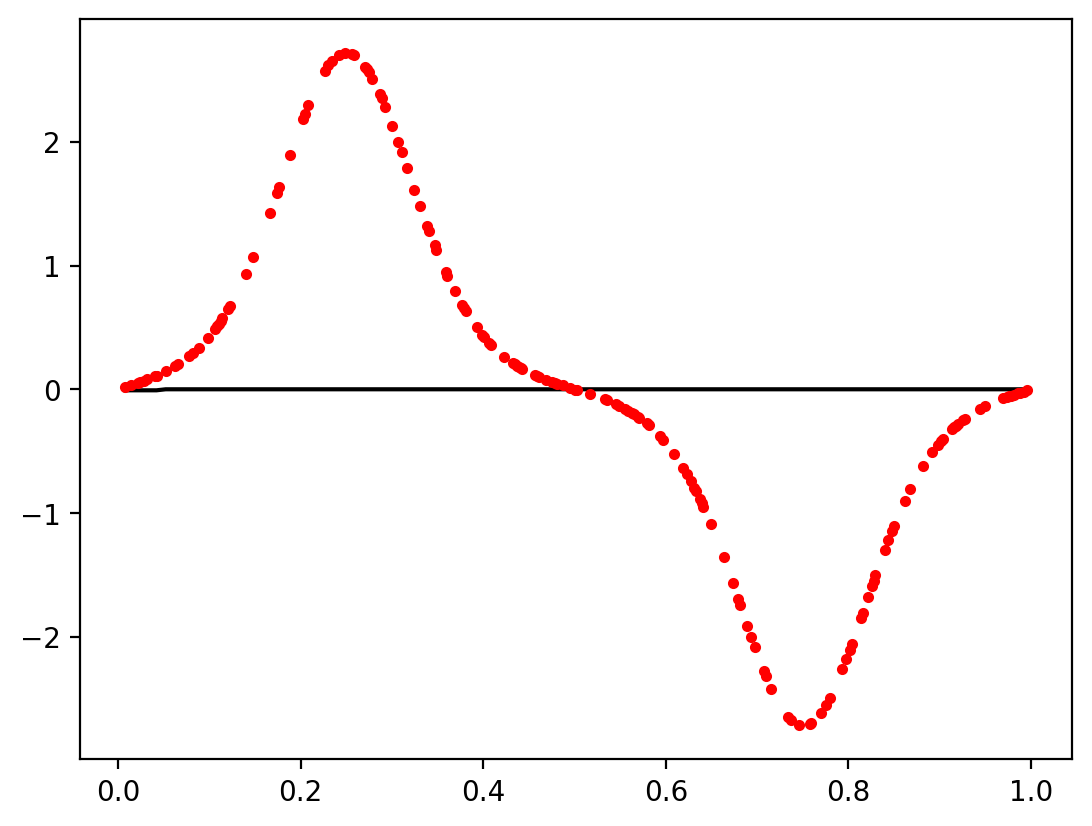

In [ ]:

plt.plot(X_test[:, 0], prediction_single_model, color="black")
plt.plot(X_test[:, 0], y_test, '.', color="red");

# Ensembles


####Let's try to build our first ensemble. Nothing special: just a banch of decision trees trained on our data. We

You can vary the number of decision tree, splitter technique and maximum depth

In [ ]:
Relative_errors = []
N_models = 1000
p = 0
for i in range(N_models):
    regressor = DecisionTreeRegressor(random_state=23+i, splitter="random", max_depth=1)

    regressor.fit(X_train, y_train)
    prediction = regressor.predict(X_test)

    p += prediction

    prediction = p / (i+1)
    relative_error = np.linalg.norm(prediction - y_test) / np.linalg.norm(y_test)
    Relative_errors.append(relative_error)
print(Relative_errors[-1])

0.771841483791092


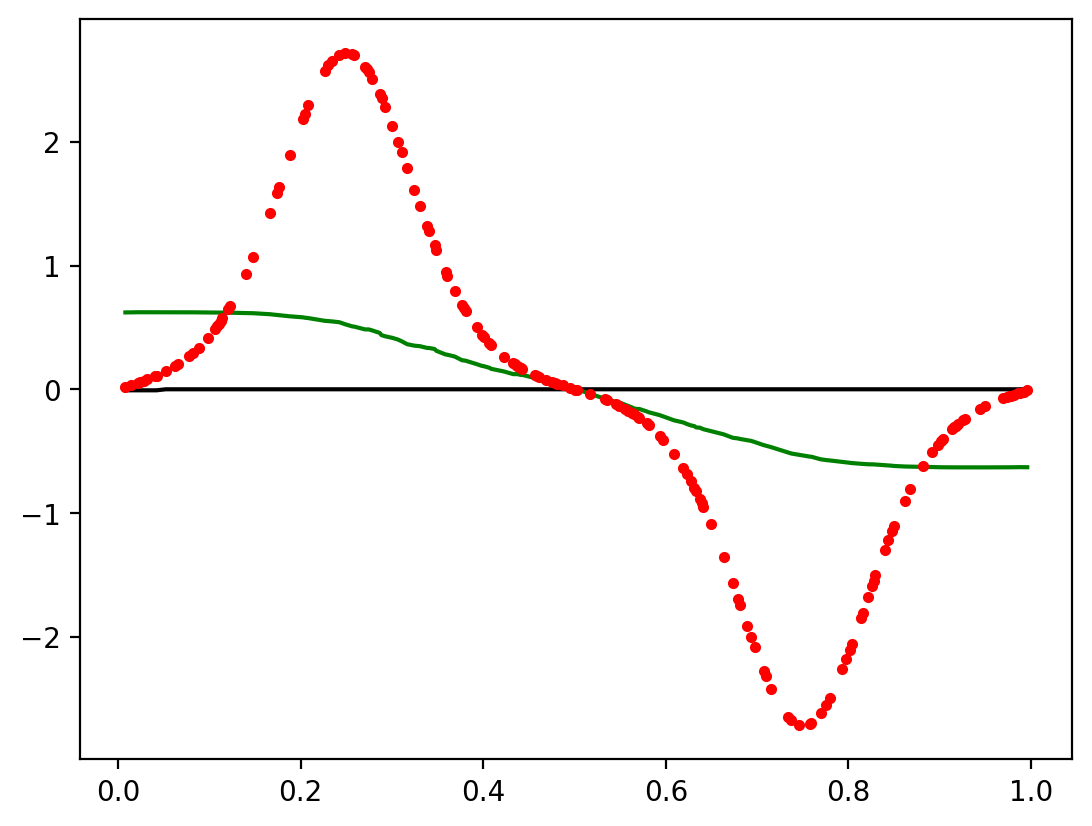

In [ ]:
plt.plot(X_test[:, 0], prediction_single_model, color="black")
plt.plot(X_test[:, 0], prediction, color="green")
plt.plot(X_test[:, 0], y_test, '.', color="red");

Let's look at the relatie error

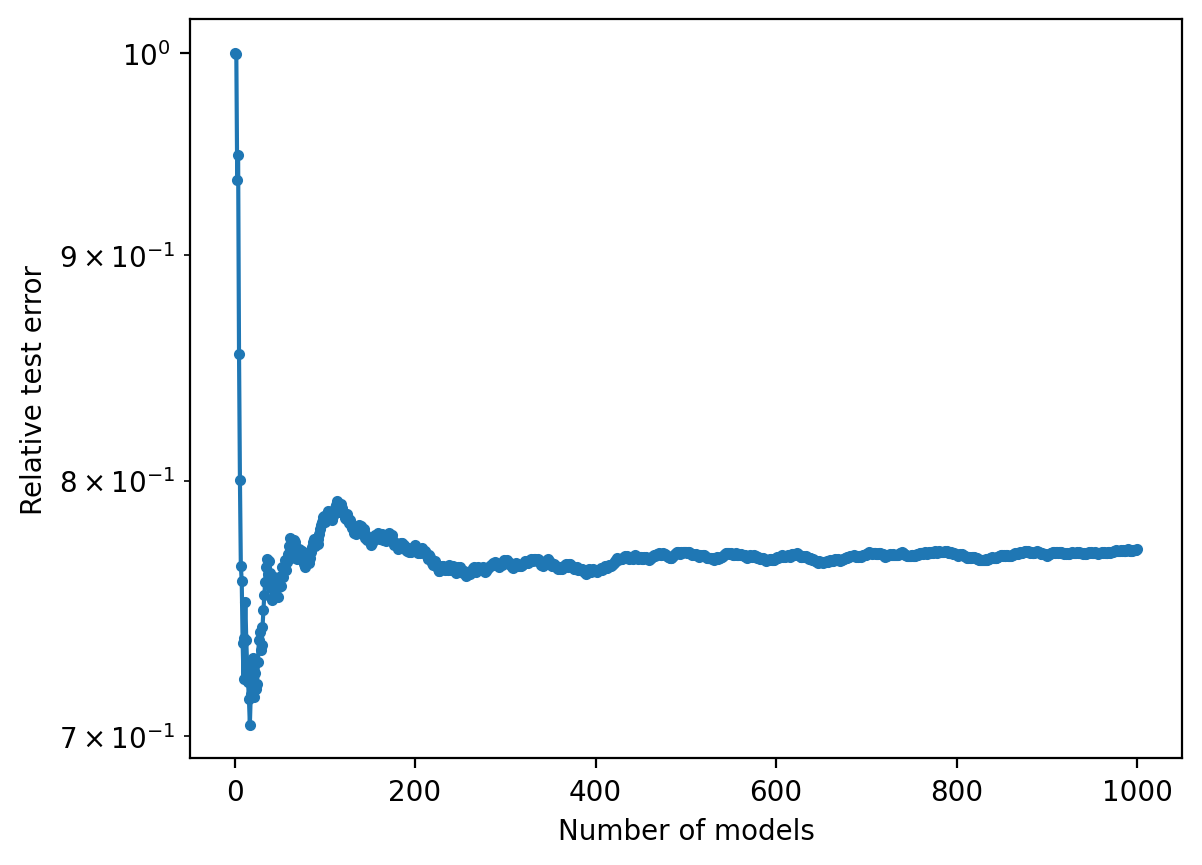

In [ ]:
plt.yscale("log")
plt.plot(np.arange(1, len(Relative_errors)+1), Relative_errors, ".-")
plt.xlabel("Number of models")
plt.ylabel("Relative test error");

## Bootstrap

#### Let's implement a function that returns an array with replacement. You can use either random.choice or random.randint for this purpose

In [ ]:
def bootstrap_indices(random_state, n_samples):
    """Return random indices with repetition (bootstrap)."""
    return np.random.RandomState(random_state).randint(low=0,high= n_samples, size=n_samples)

In [ ]:
np.random.RandomState(23).randint(low=0,high= 4, size=5)

array([3, 2, 0, 1, 2])

In [ ]:
np.random.choice(np.arange(0, len(X_train)), X_train.shape[0])

array([107, 268, 327, 249, 234, 156, 138, 208,  61, 154,  25,  32, 260,
       138, 138,   0,  84, 133,  37, 120, 101,  41, 232, 231,  67, 207,
       324, 173, 248, 273, 251, 159, 265, 187,  27, 218, 299, 246, 257,
       327, 104, 191,  45, 239,  30,  65,  57,  75, 205, 269, 169, 127,
       277,  13, 323,  61, 330, 238,  92, 238,   9, 334, 178, 144,  52,
       257, 139,  12,  48, 288, 103, 308, 318, 213,  52, 323, 312,  48,
       328, 180,  99,  86, 268,  50,  59, 249,  76, 311, 289, 191,   4,
       331, 184, 123, 284, 294, 101, 156,  65, 207,  34, 256, 155, 299,
        67,  19, 251,  19, 219, 206, 202,  78, 232, 255, 157, 298, 162,
        36,  22,  73,  30,  92, 149, 210,  61,   2, 195,  83, 164, 311,
       240,  36, 181,   9,  19,  28, 324, 195, 109, 241,  89, 122,  37,
       240,  50,  93, 118, 319, 263, 128, 314, 309, 304,  84, 260,  78,
       235, 209, 247, 288, 286, 238, 199, 159,  95, 302, 297, 108,  54,
        86, 126, 129, 221, 313, 177,  48, 266, 333, 291, 283,  8

#### Now let's pick only bootstrapped data for each tree. With this data we could not bootstrap features (why?). How would you modernize the code to deal with this issue?


In [ ]:
Relative_errors = []
N_models = 1000
p = []
pp = 0

for i in range(N_models):
    ix = bootstrap_indices(i+23, X_train.shape[0])

    X_train_ = X_train[ix, :]
    y_train_ = y_train[ix]
    regressor = DecisionTreeRegressor(random_state=i+1,  max_depth=1)

    regressor.fit(X_train_,y_train_)
    prediction = regressor.predict(X_test)

    p.append(prediction )
    pp +=prediction
    prediction = pp / (i+1)
    relative_error = np.linalg.norm(prediction - y_test) / np.linalg.norm(y_test)
    Relative_errors.append(relative_error)
print(Relative_errors[-1])

0.6461562991574427


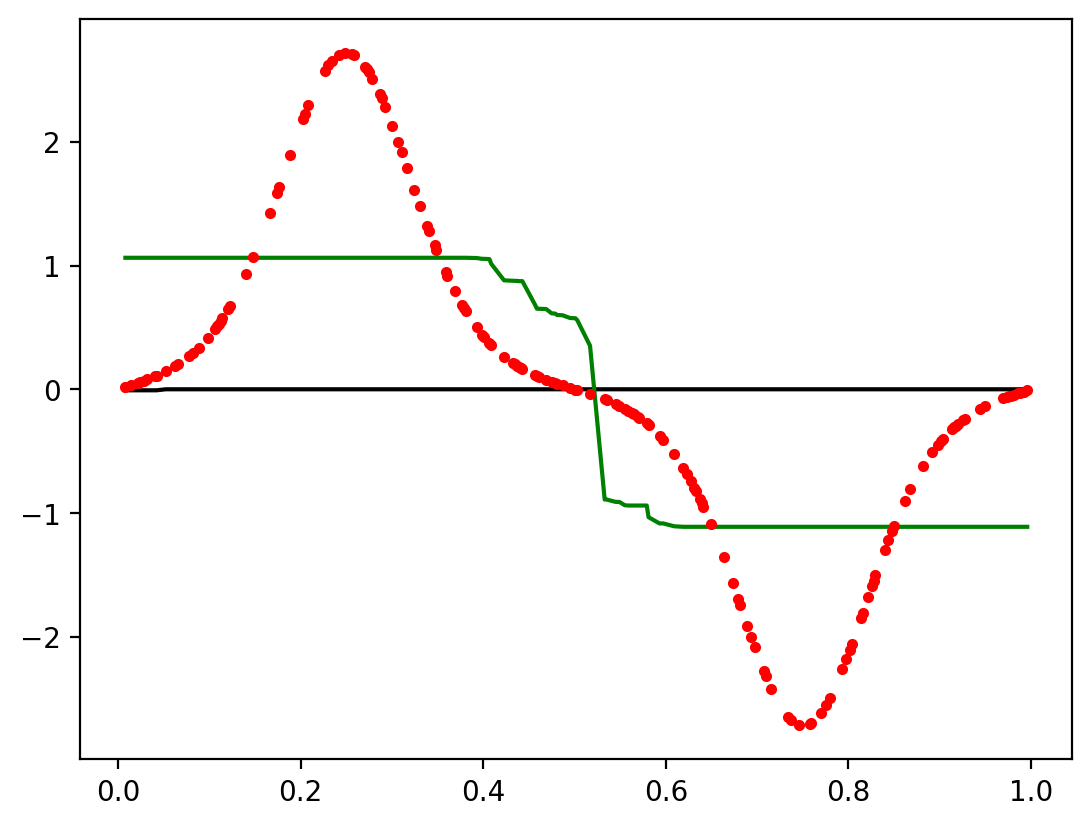

In [ ]:
plt.plot(X_test[:, 0], prediction_single_model, color="black")
plt.plot(X_test[:, 0], np.array(p).mean(axis=0), color="green")
plt.plot(X_test[:, 0], y_test, '.', color="red");

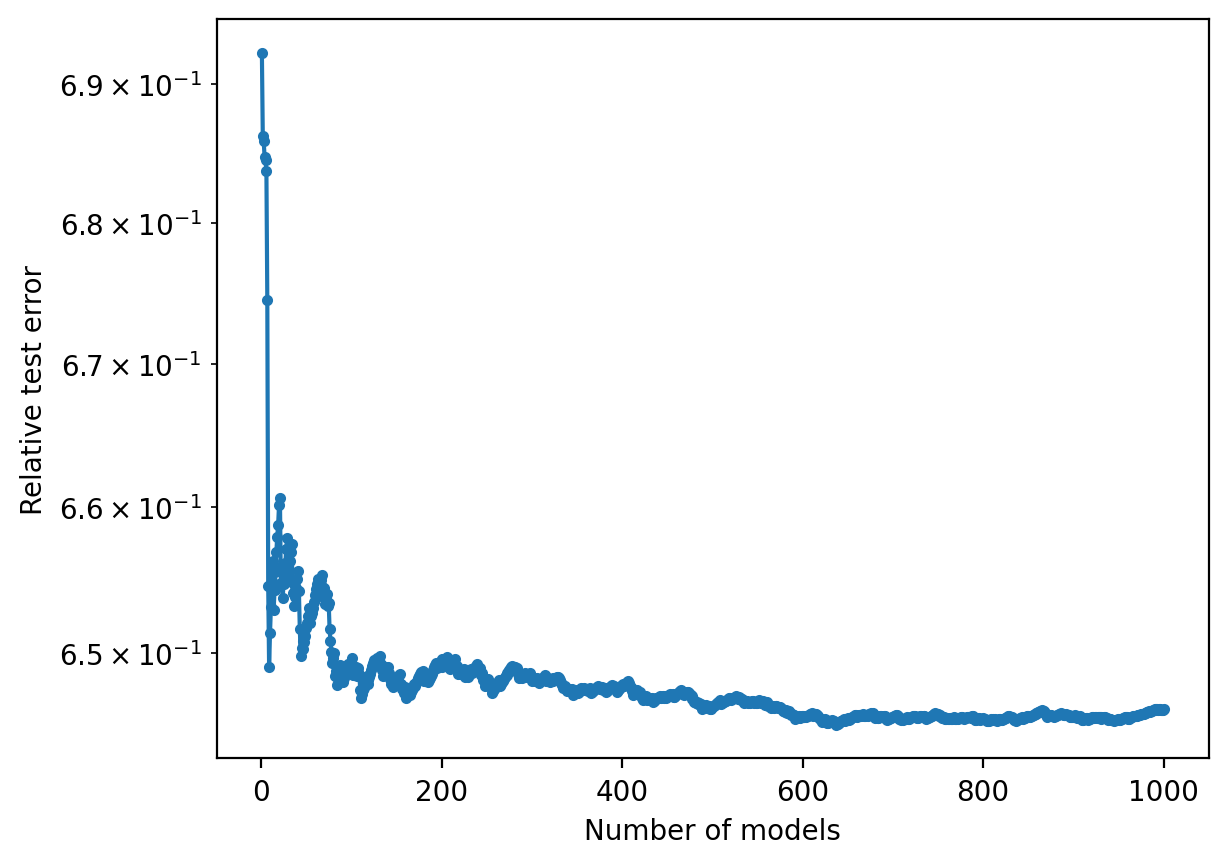

In [ ]:
plt.yscale("log")
plt.plot(np.arange(1, len(Relative_errors)+1), Relative_errors, ".-")
plt.xlabel("Number of models")
plt.ylabel("Relative test error");

# BOOSTING

#### Look how boosting resembles gradient descent!

## Gradient Boosting

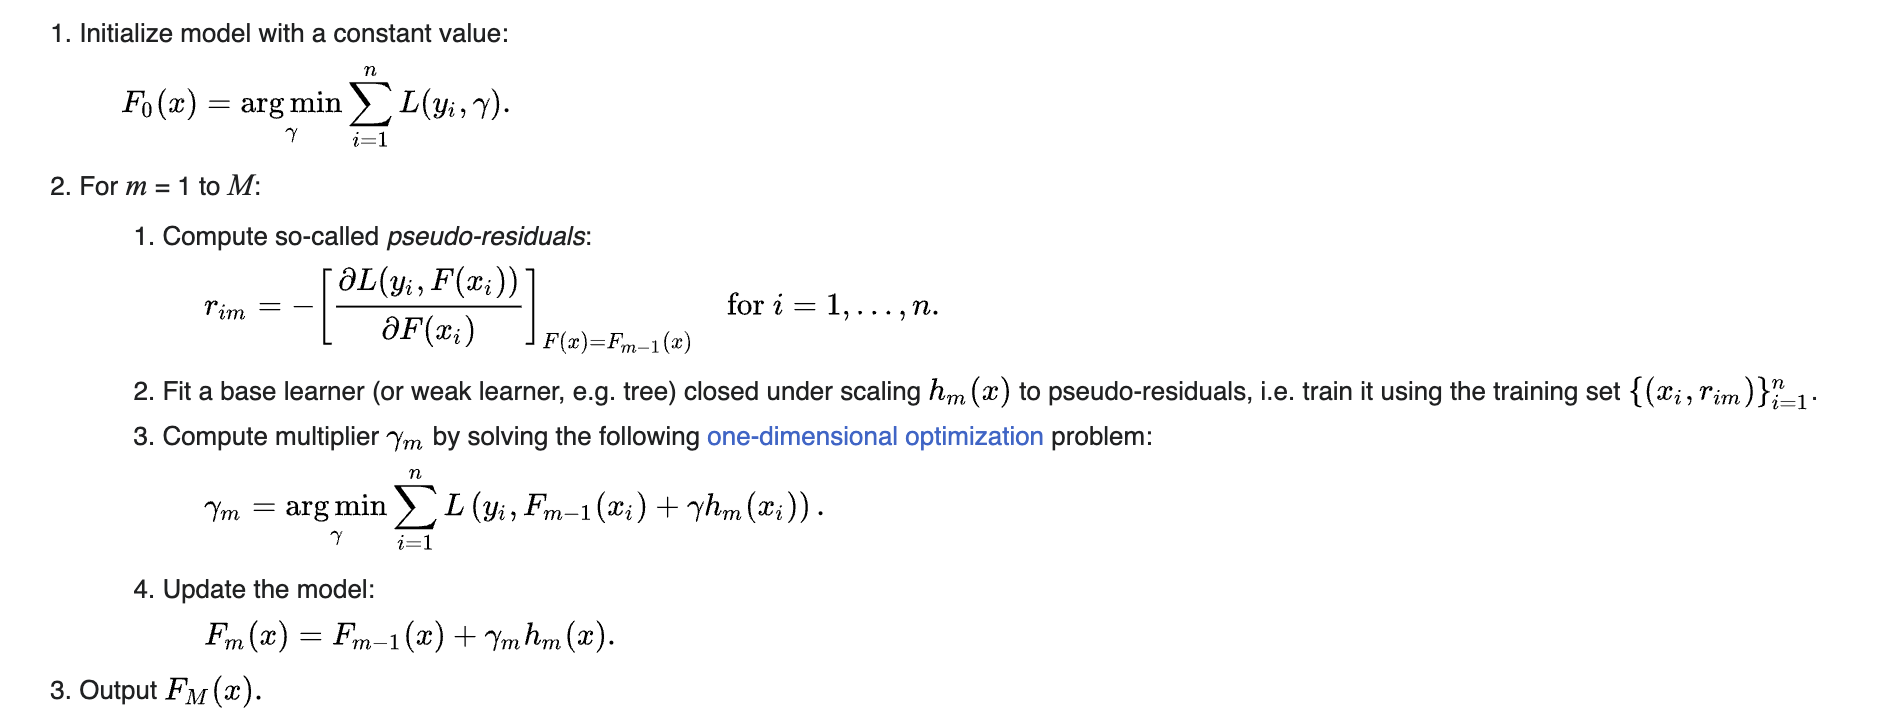

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
gbc = GradientBoostingRegressor()
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_test)

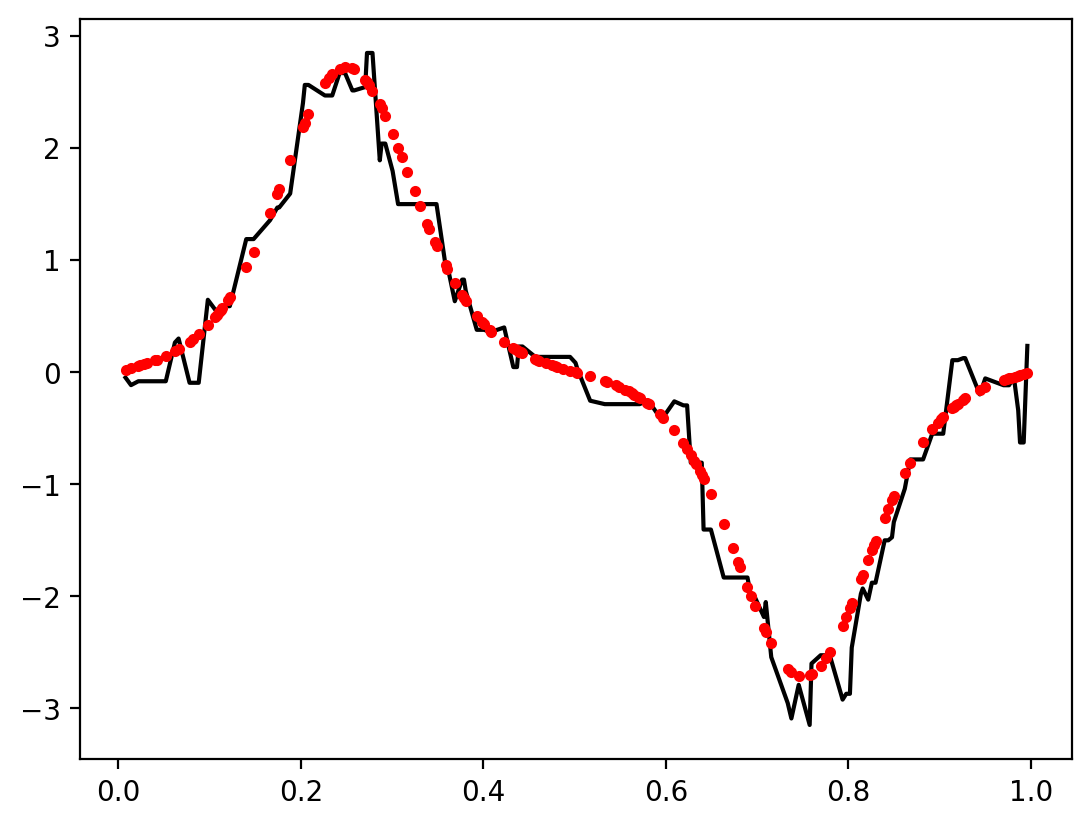

In [ ]:
plt.plot(X_test[:, 0], gbc_preds, color="black")
plt.plot(X_test[:, 0], y_test, '.', color="red");

# MAKE SUNNY MOONS

Look! I spoiled all the classifiers! Do smth in order to generate better predictions!!

In [ ]:
from sklearn.datasets import make_moons, make_circles

def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons

    np.random.seed(0xBEEFBAD)
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)

    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)

    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R

    return X, y


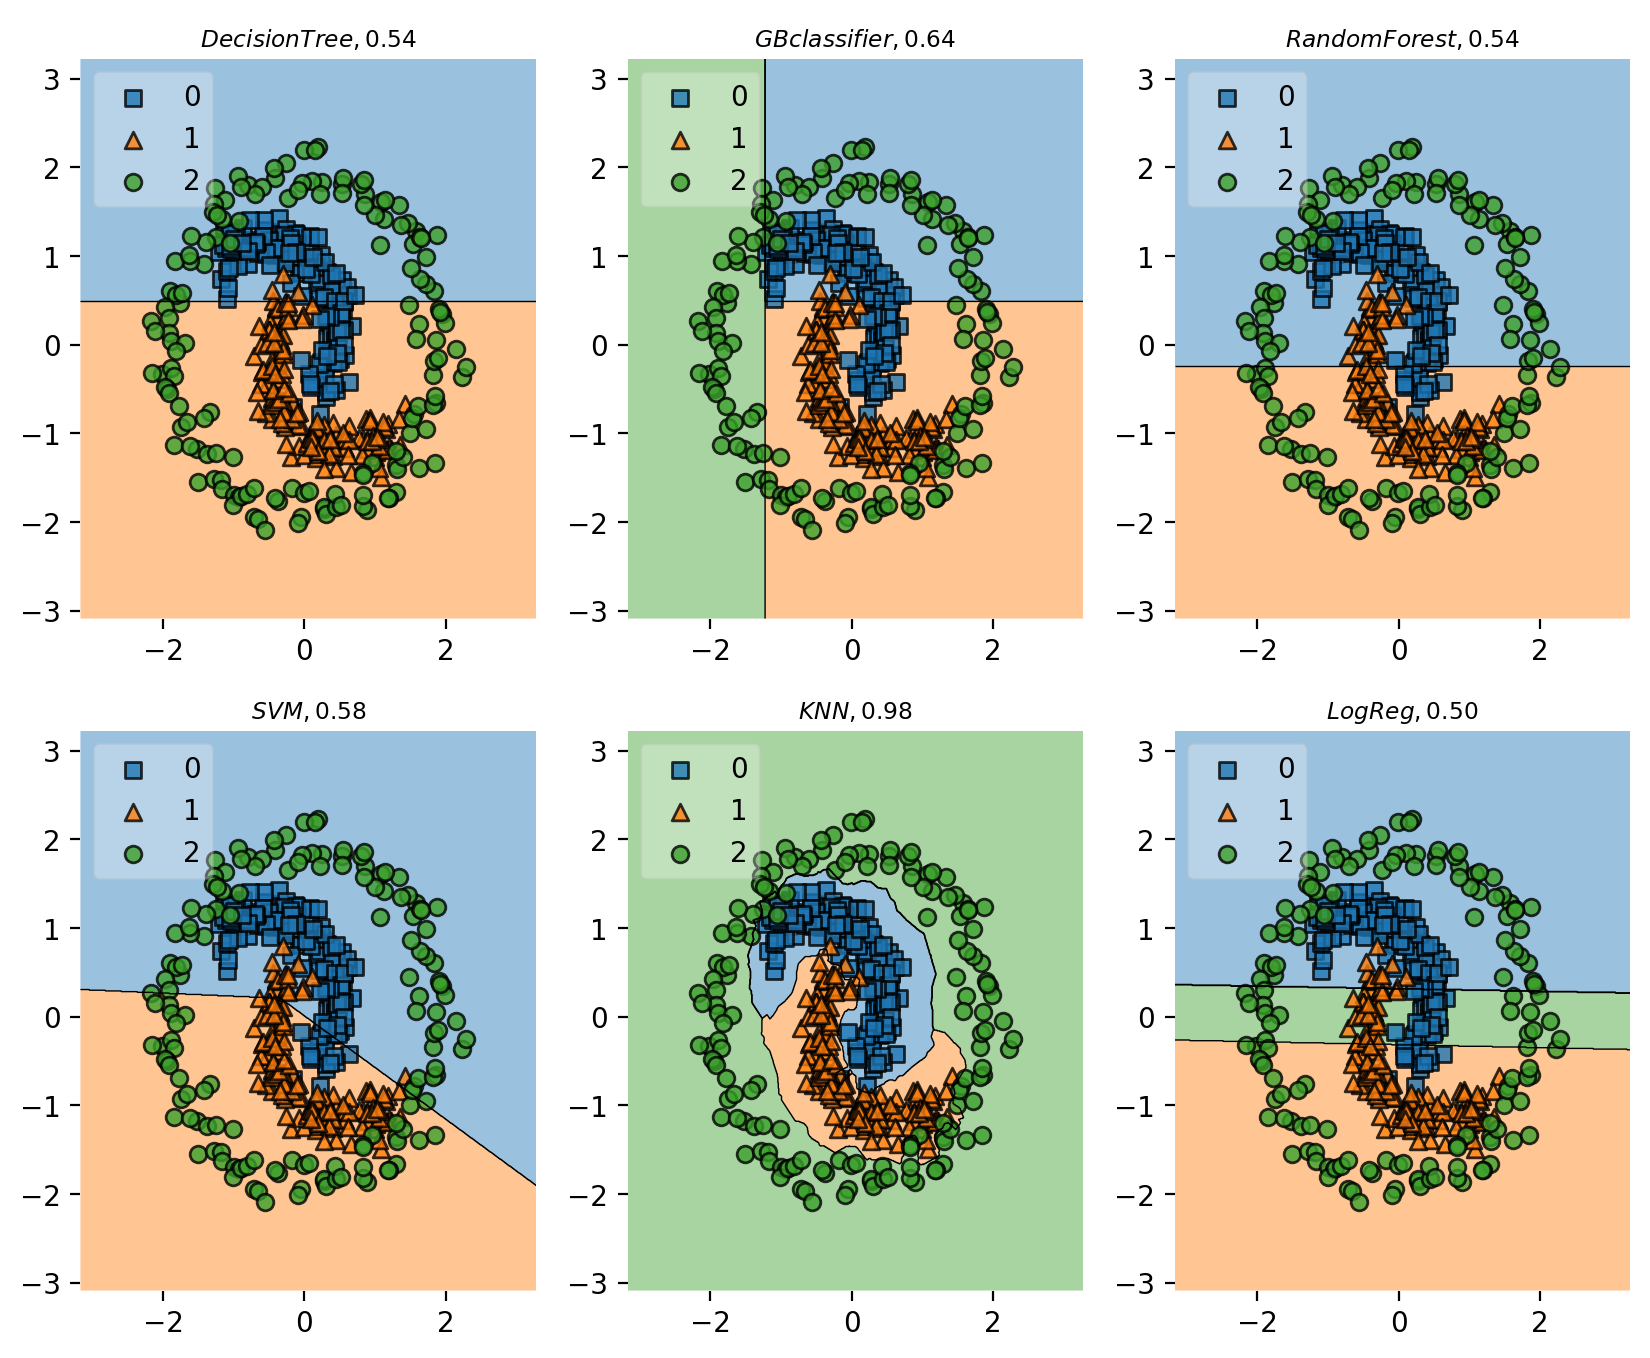

In [ ]:
import mlxtend
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

tuples = [(0, 0),(0, 1),(0, 2),(1, 0),(1, 1),(1,2)]

clf0 = tree.DecisionTreeClassifier(random_state=1, max_depth=1)
clf1 = GradientBoostingClassifier(max_depth=1, n_estimators=1)
clf2 = RandomForestClassifier(random_state=1, n_estimators=1, max_depth=1)
clf3 = SVC(kernel='linear')
clf4 = KNeighborsClassifier(2)
clf5 = LogisticRegression()

gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(10,8))

labels = ['Decision Tree  ','GB classifier  ', 'Random Forest  ', 'SVM  ', 'KNN ', 'LogReg  ']
for clf, lab, grd in zip([clf0, clf1, clf2,  clf3, clf4, clf5],
                         labels,
                         tuples):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    a = accuracy_score(y, clf.predict(X))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title('$_{'+str(lab)+ ', ' + str('{:.2f}'.format(a))+'}$')

plt.show()

# Other boosting libraries

In [ ]:
!pip install catboost xgboost

## XGBoost takes Newton algorithm instead of Gradient descent as a base

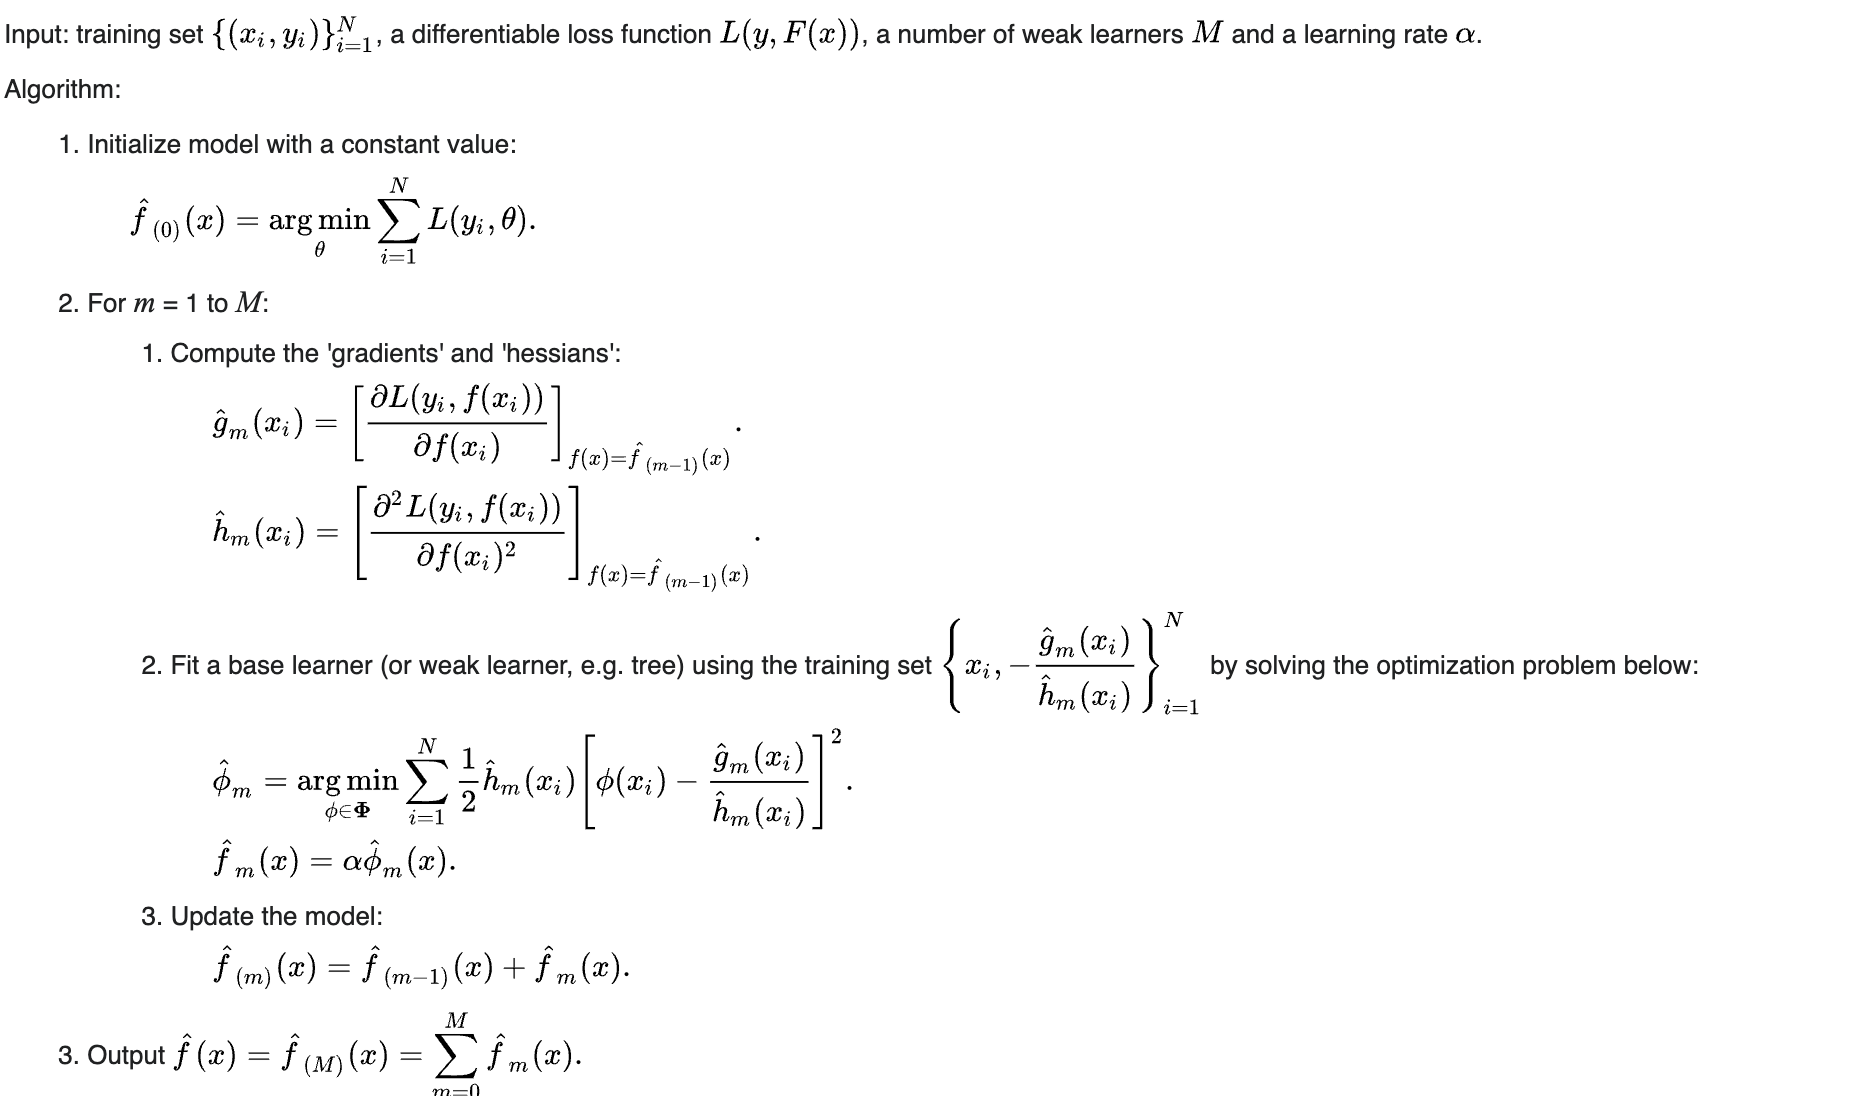

In [ ]:
from xgboost import XGBClassifier
bst = XGBClassifier(n_estimators=5, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)
y_pred = bst.predict(X_test)
score = bst.score(X_test, y_test)
print(f'xgboost accuracy is {score * 100:.2f}')

xgboost accuracy is 94.74


#### While using catboost, you don't have to worry about dealing with categorical features

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=3, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
cb.fit(X_train, y_train, plot=True)
preds = cb.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3119495	total: 1.64ms	remaining: 3.28ms
1:	learn: 0.2168512	total: 3.17ms	remaining: 1.58ms
2:	learn: 0.1818232	total: 5.06ms	remaining: 0us


In [ ]:
cb.score(X_test, y_test)

0.9385964912280702

In [ ]:
from catboost import Pool, cv

cv_data = [["France", 1924, 44],
           ["USA", 1932, 37],
           ["Switzerland", 1928, 25],
           ["Norway", 1952, 30],
           ["Japan", 1972, 35],
           ["Mexico", 1968, 112]]

labels = [1, 1, 0, 0, 0, 1]

cat_features = [0]

cv_dataset = Pool(data=cv_data,
                  label=labels,
                  cat_features=cat_features)

params = {"iterations": 100,
          "depth": 2,
          "loss_function": "Logloss",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=2,
            plot="True")


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 0.5738373179
bestIteration = 84

Training on fold [1/2]

bestTest = 0.693188484
bestIteration = 0

